# Introduction

The main difference b/w supervised and unsupervised learning is that supervised algorithms always have some classes and labels to deal with it but in the case of unsupervised algorithms we don't have any labels in our input data. So what algorithms learn is the structure of the data without any assistance.


This Creates two main differences:

1. It allows us to process the large amount of data because we don't have to deal with the labels anymore.

2. We can't use performance metric to evaluate our model.

One of the most common tasks in unsupervised learning is dimensionality reduction.
It will be helpful in the data visualization and also will help in dealing with the multicolinearity of your data and prepare the data for supervised learning algos.


## Principal Component Analysis (PCA)

It's a dimensionality reduction technique.

All observations can be considered as an ellipsoid in a subspace or in simple terms reducing the dimensions of feature metrics by composing them into lower dimensional space.


In order to decrease the dimensionality of our data from  n  to  k  with  k ≤ n , we sort our list of axes in order of decreasing dispersion and take the top- k  of them

PCA plot converts the correlations among all if the cells into a 2D graph.

Features that are highly correlated are clusterd together.

After that we can identify the different type of clusters.

Let's try this with the PCA

Step1: Use decomposition.PCA for decomposing the dimensions into desired dimension

Step2: Center all the features with the mean of the entire matrix

Step3: Fit the centered features in pca.fit(<centered_values>)

Step4: Transform the features via pca.transform(<centered_values>)

In [1]:
# Let's try this with the PCA
# Step1: Use decomposition.PCA for decomposing the dimensions into desired dimension
# Step2: Center all the features with the mean of the entire matrix
# Step3: Fit the centered features in pca.fit(<centered_values>) with rows 0
# Step4: Transform the features via pca.transform(<centered_values>)
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_digits
import matplotlib.pyplot as plt

## Prediction without PCA

In [2]:
dataset = load_iris()

X = dataset.data
y = dataset.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

This wasn't so much improvement but when it comes to higher number of dataset its going to help alot.

In [4]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [5]:
preds = clf.predict_proba(X_test)

In [6]:
from sklearn.metrics import accuracy_score

print(f"Accuracy score without PCA: {accuracy_score(y_test, preds.argmax(axis=1)):.2f}")

Accuracy score without PCA: 0.89


## With PCA

In [7]:
pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
X_pca = pca.transform(X_centered)

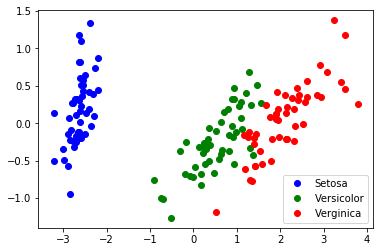

In [9]:
plt.plot(X_pca[y==0, 0], X_pca[y==0, 1], 'bo', label="Setosa")
plt.plot(X_pca[y==1, 0], X_pca[y==1, 1], 'go', label="Versicolor")
plt.plot(X_pca[y==2, 0], X_pca[y==2, 1], 'ro', label="Verginica")
plt.legend(loc=0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3,
                                                    stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [18]:
preds = clf.predict_proba(X_test).argmax(axis=1)
print(f"Accuracy score without PCA: {accuracy_score(y_test, preds):.2f}")

Accuracy score without PCA: 0.91


## Handwritten Numbers Dataset

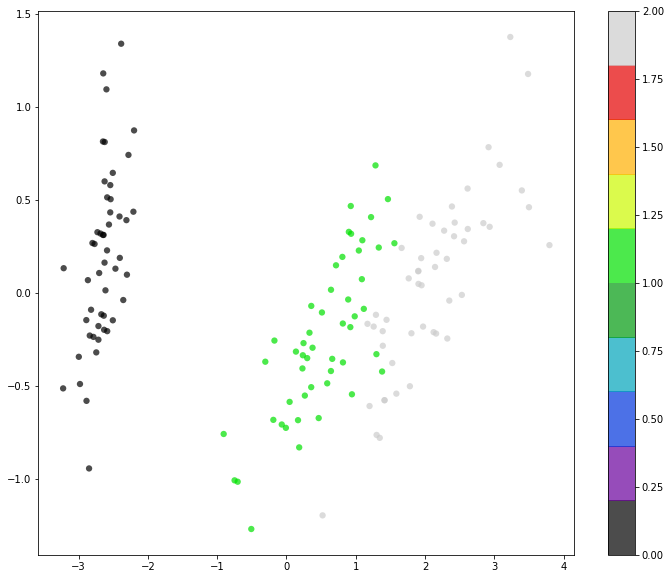

In [19]:
plt.figure(figsize=(12, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
           edgecolors='none', alpha=0.7, s=40,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
